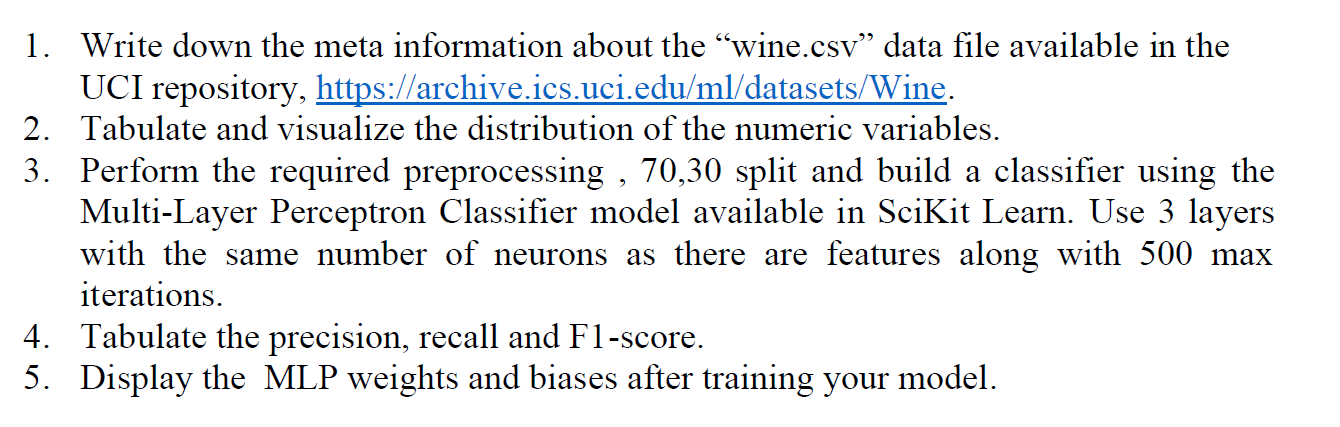

# MetaData

* Dataset Characteristics   = Multivariate
* Number of instances       = 178
* Attribute Characteristics = Integer, Real
* Number of Attributes      = 13
* Associated Tasks          = Classification
* Missing Values            = No

**Data Set Information:**

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set.

The attributes are:
* 1) Alcohol
* 2) Malic acid
* 3) Ash
* 4) Alcalinity of ash
* 5) Magnesium
* 6) Total phenols
* 7) Flavanoids
* 8) Nonflavanoid phenols
* 9) Proanthocyanins
* 10) Color intensity
* 11) Hue
* 12) OD280/OD315 of diluted wines
* 13) Proline

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
df = pd.read_csv('wine.csv')
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [ ]:
for i in range(len(df.columns)):
    print(f'Unique values in column {df.columns[i]}:', df[df.columns[i]].unique())

Unique values in column Class: [1 2 3]
Unique values in column Alcohol: [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]
Unique values in column Malic acid: [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.7

In [ ]:
X = df.copy()
y = X.pop('Class')

X.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


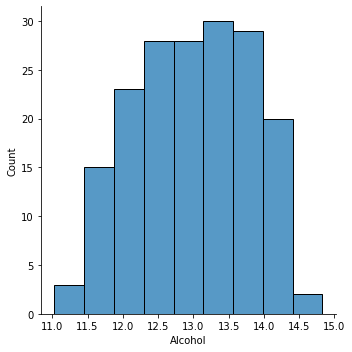

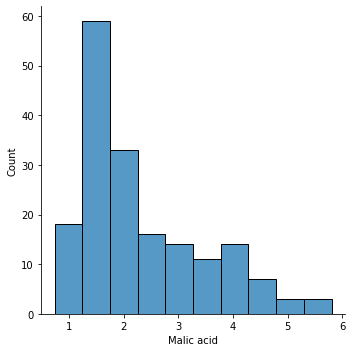

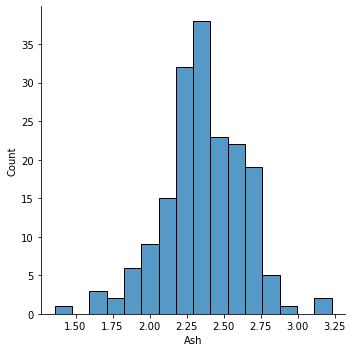

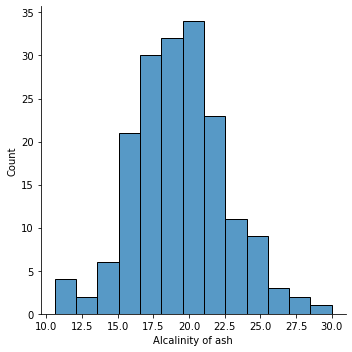

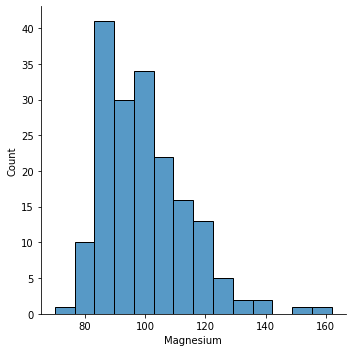

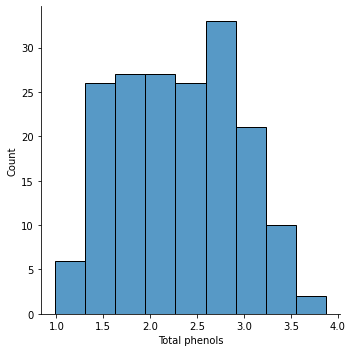

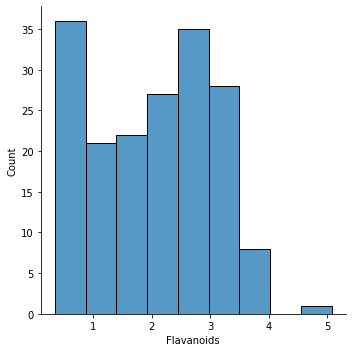

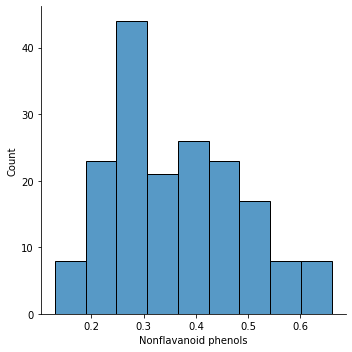

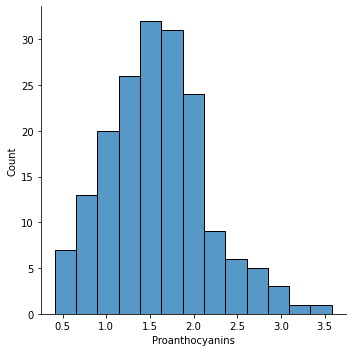

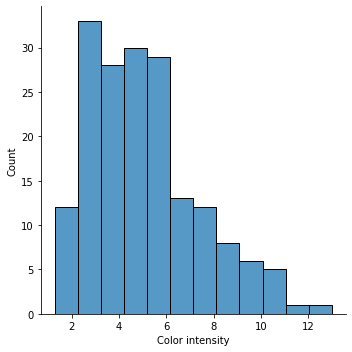

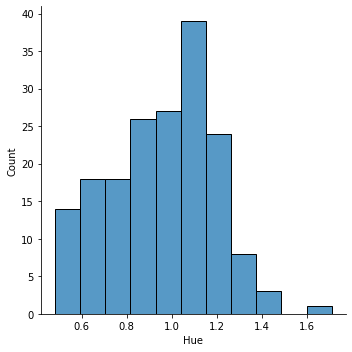

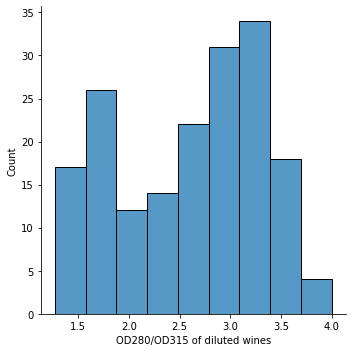

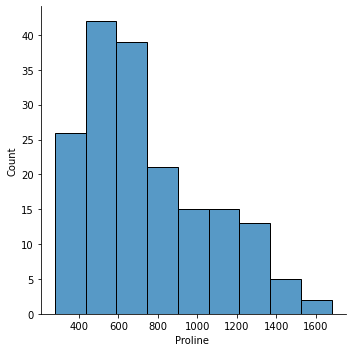

In [ ]:
for i in X.columns:
    sns.displot(X[i])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=42)

print(f"Shape of X_train {X_train.shape}")
print(f"Shape of X_test {X_test.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of y_test {y_test.shape}")

Shape of X_train (124, 13)
Shape of X_test (54, 13)
Shape of y_train (124,)
Shape of y_test (54,)


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(13, 13, 13),
                    random_state=42, 
                    max_iter=500)

clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500, random_state=42)

In [ ]:
y_score = clf.predict_proba(X_test)
y_pred  = clf.predict(X_test)
clf.score(X_test, y_test)

0.9814814814814815

# Tabulating all the Scores

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [ ]:
clf.coefs_

[array([[-0.14057256,  0.44183169,  0.19677737,  0.073617  , -0.30129064,
         -0.35821063, -0.41147411,  0.34082998,  0.07869672,  0.17342496,
         -0.42922625,  0.42021425,  0.2904512 ],
        [-0.29178734, -0.28949659, -0.27558573, -0.21175917,  0.01668158,
         -0.09080675, -0.19866963,  0.08976533, -0.31683461, -0.22694298,
         -0.1072766 , -0.03118567,  0.24619618],
        [-0.30858826,  0.02231755,  0.07119627, -0.45706325,  0.08428387,
         -0.34413213, -0.40474289,  0.42016481,  0.41615986,  0.26973548,
         -0.16309351, -0.35626808,  0.15290366],
        [-0.07625991, -0.35004955, -0.00300749, -0.47132353,  0.36287279,
         -0.25980533,  0.16838612, -0.1934629 ,  0.01331283,  0.01760997,
         -0.27422692,  0.41990598,  0.23682882],
        [ 0.4014085 ,  0.38549703,  0.07591674,  0.38511524, -0.3649392 ,
         -0.31997345, -0.42220016, -0.17697808, -0.08758258, -0.24611365,
          0.28697331, -0.11585074, -0.18484423],
        [ 0.018

In [ ]:
clf.intercepts_

[array([ 0.06741343,  0.18004082, -0.46444739, -0.01045654, -0.26277436,
         0.11142581, -0.29890684,  0.17257406, -0.10882116,  0.39280202,
        -0.34825861, -0.15269851, -0.37136263]),
 array([ 0.34250436,  0.15246791, -0.33594756, -0.40958643,  0.16780966,
        -0.46146903,  0.07890997,  0.42295953,  0.08994915, -0.12835366,
         0.13766687, -0.04010933,  0.04382719]),
 array([ 0.05325706,  0.25843475,  0.43391046,  0.30570594, -0.2493738 ,
        -0.04751566, -0.35629211,  0.41303618,  0.0718073 , -0.24162785,
         0.16496468,  0.11349394, -0.14005993]),
 array([ 0.41267825,  0.31764885,  0.4467834 , -0.3751563 ,  0.2218103 ,
         0.42114389, -0.30626136, -0.41649691,  0.23477151,  0.07129746,
         0.32841847, -0.37168243,  0.29343553]),
 array([ 0.44051791, -0.16217693,  0.36921764])]